In [6]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter
from einops import rearrange

In [2]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Downloads/rigidethanol_112820_samgl_p12replicates.pkl' ,
         'rb') as loader:
     replicates_rigidethanol = pickle.load(loader)

replicates = replicates_rigidethanol

In [3]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('untracked_data/embeddings/rigidethanol/rigidethanol_120220_samgl_n100_pall_nrep25replicates.pkl' ,
         'rb') as loader:
     replicates_rigidethanol = pickle.load(loader)

replicates = replicates_rigidethanol

In [32]:
with open('/Users/samsonkoelle/Downloads/rigidethanol_112820_samgl_p12results.pkl' ,
         'rb') as loader:
     results_rigidethanol = pickle.load(loader)


In [33]:
nreps = 25
results  = results_rigidethanol

In [37]:
r

16

In [36]:
results[r][1].values()

dict_values([array([[[-0.07232434, -0.02005209, -0.01802236],
        [-0.06686384, -0.01737101, -0.01778543],
        [ 0.0664534 ,  0.01673443,  0.01698406],
        ...,
        [-0.00284178,  0.02798269, -0.01697666],
        [ 0.00357099, -0.02778126,  0.01709725],
        [-0.0030519 ,  0.02720283, -0.01668887]],

       [[ 0.00840006, -0.07257099,  0.00686212],
        [-0.00743961,  0.06572538, -0.00591535],
        [-0.00734412,  0.06552585, -0.00625585],
        ...,
        [ 0.01549549, -0.06173755, -0.01435324],
        [-0.0155979 ,  0.06178443,  0.01389243],
        [ 0.0155477 , -0.06196814, -0.01393637]],

       [[-0.07665004, -0.05279967,  0.00992162],
        [-0.06981497, -0.04798597,  0.00967508],
        [ 0.06970715,  0.04772557, -0.0100639 ],
        ...,
        [-0.01778366, -0.1267089 , -0.24657022],
        [ 0.01830039,  0.12629776,  0.24559182],
        [-0.01845643, -0.1264057 , -0.24579649]],

       ...,

       [[ 0.08427386, -0.02199689,  0.01351925]

In [34]:

for r in range(nreps):
    print(r)
    cs = rearrange(np.asarray(list(results[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(list(results[r][1].keys()))
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates[r].cs_order = cs_reorder
    replicates[r].xaxis_reorder = xaxis_reorder

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


KeyError: 16

In [8]:
def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
        selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

        selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]
    
        return(selected_functions_at_selection_lambda)
    else:
        return(np.asarray([]))

def get_toplot(supports,p,d):
    to_plot = np.zeros(np.repeat(p,d))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            if len(support_indices[i]) > 0:
                #print(tuple(support_indices[i]), to_plot[tuple(support_indices[i])])#, print(to_plot[-1])
                to_plot[tuple(support_indices[i])] += 1

    return(to_plot)

supports_rigidethanol = {}
for i in range(nreps):
    print(i)
    supports_rigidethanol[i] = get_support(replicates[i].cs_order, dim = 2)

toplot_rigidethanol = get_toplot(supports_rigidethanol, 12,2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [9]:
def plot_cosines(cosines, ax, colors):
    p = cosines.shape[0]
    sns.heatmap(cosines ,ax = ax)
    for xtick, color in zip(ax.get_xticklabels(), colors):
        xtick.set_color(color)
    for ytick, color in zip(ax.get_yticklabels(), colors):
        ytick.set_color(color)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 500 / p)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 500 / p)
    
    ax.set_ylabel(r"$g_j$", fontsize = 70)
    ax.set_xlabel(r"$g_i$", fontsize = 70)
    #ax.set_title(r"$\text{hi}$")
    ax.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{ij'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_i (\xi_i) \|_2 \| grad_{\mathcal M} g_j(\xi_i) \|_2} $",
                fontsize = 70)
    
def plot_watch_custom(to_plot, p, ax,colors):
    #fig, ax = plt.subplots(figsize = (15,15))
    #%matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    #figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    ax.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
        ax.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = r"$g_{{{}}}$".format(j),color=colors[j],#cmap.colors[j],
                  fontdict = {'fontsize' : 70},
                  horizontalalignment='center',
         verticalalignment='center')



        ax.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=colors[j], marker  = 'o', s = 200*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                ax.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    ax.text( x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 40})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')

                #axes.axline((x1, y1), (x2, y2))
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_title(r"$\omega = 25$")

In [14]:
colors = np.hstack([np.repeat('orange',9), np.repeat('blue',3)])

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


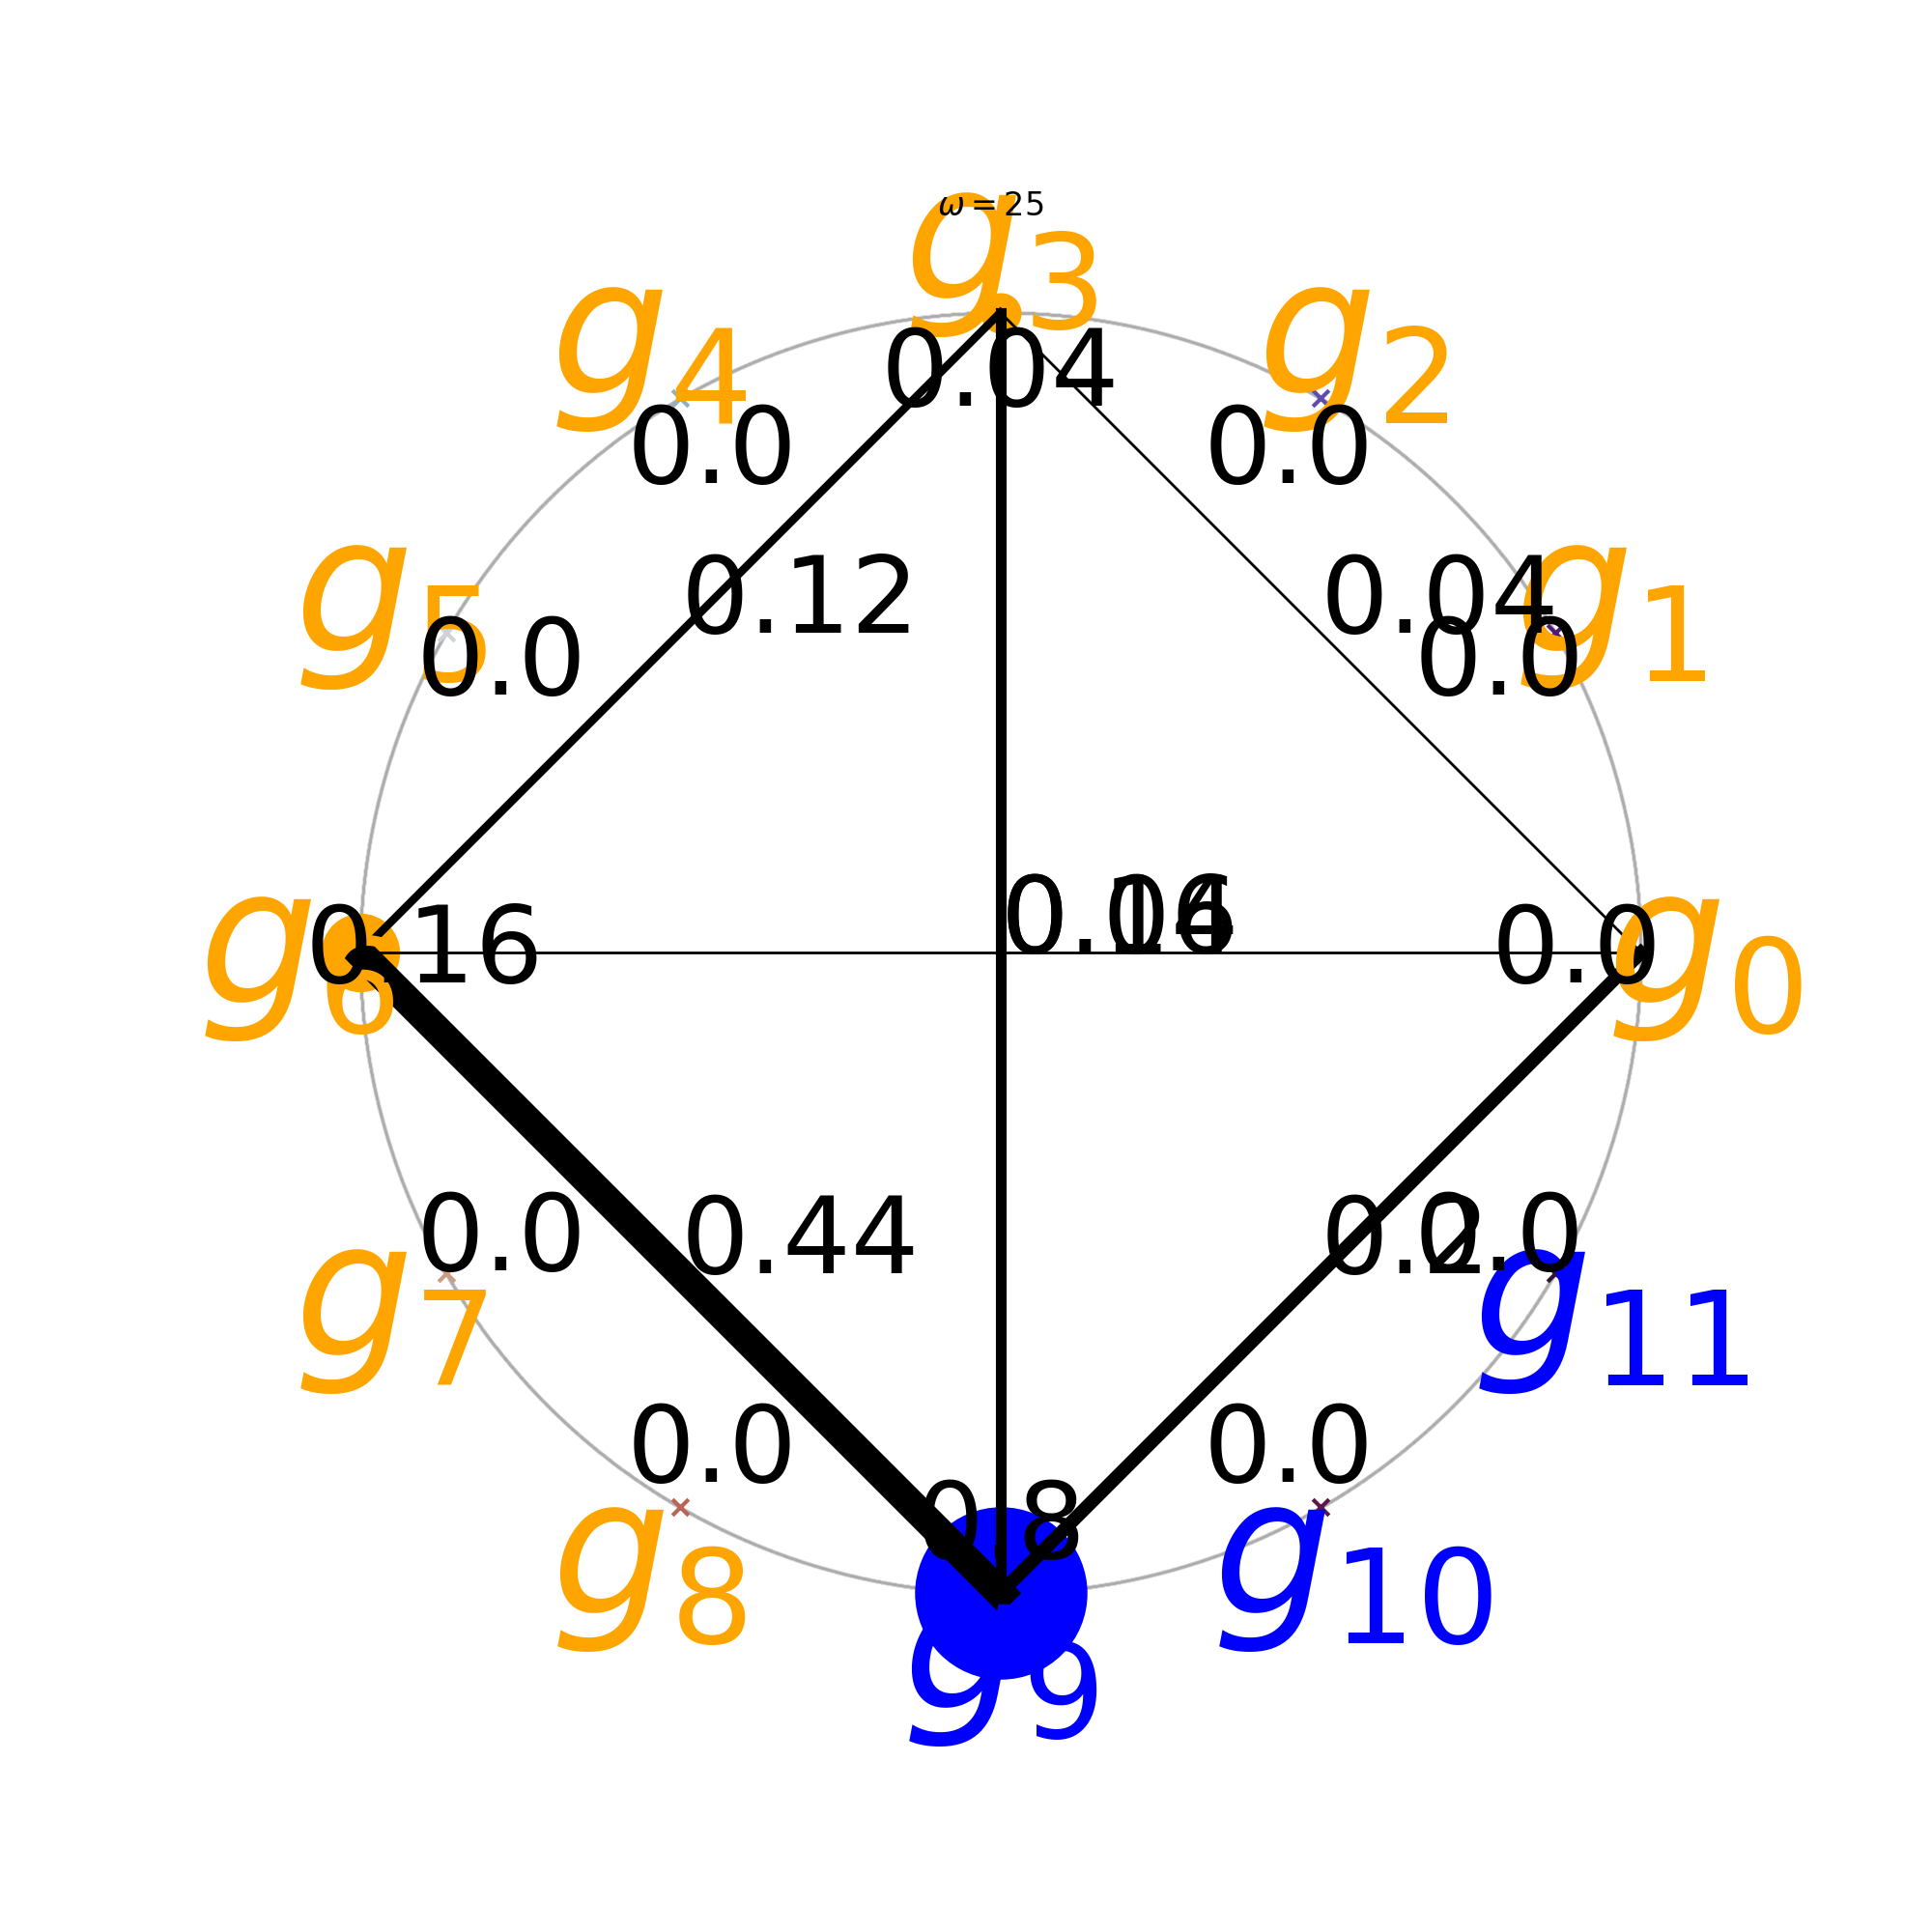

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


In [13]:

fig, ax = plt.subplots(figsize=(10,10))
plot_watch_custom(toplot_rigidethanol, 12, ax,colors)


<IPython.core.display.Javascript object>


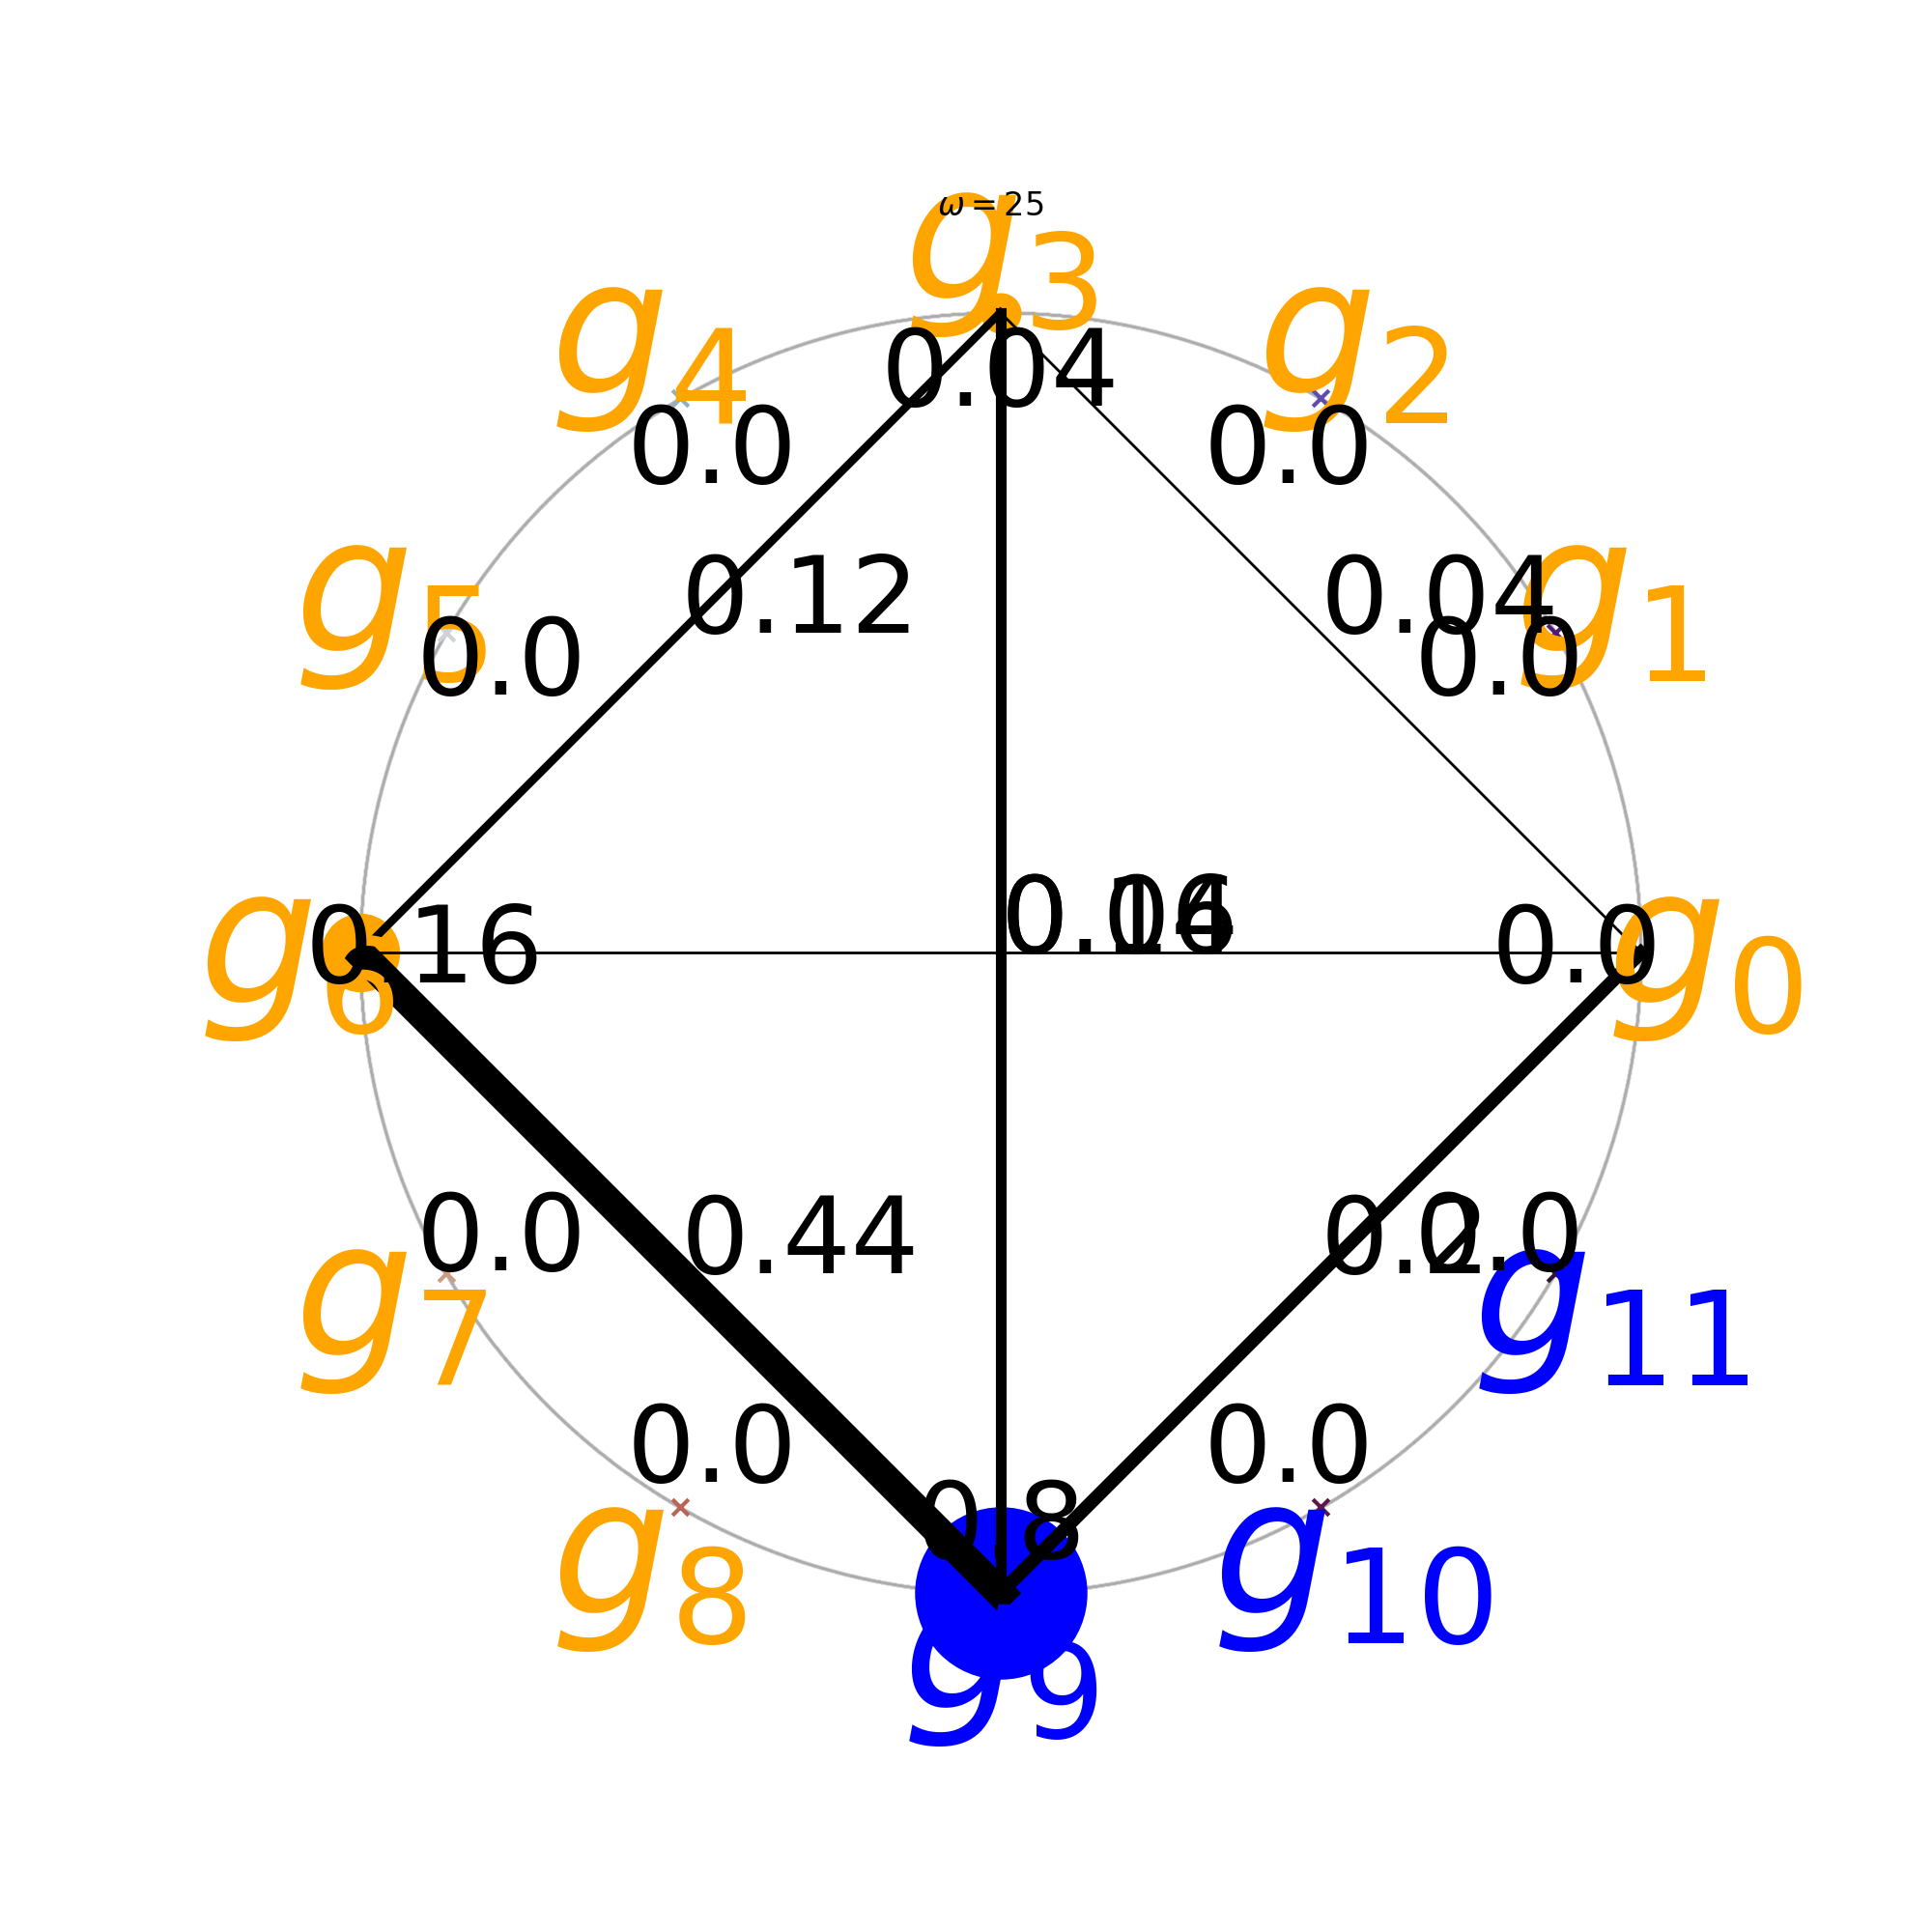

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


In [15]:

fig, ax = plt.subplots(figsize=(10,10))
plot_watch_custom(toplot_rigidethanol, 12, ax,colors)
plt.savefig('/Users/samsonkoelle/samalg')

In [38]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Downloads/rigidethanol_112820_samgl_pallresults.pkl' ,
         'rb') as loader:
     results_rigidethanol = pickle.load(loader)


In [39]:
results_rigidethanol[0][1][0.].shape

(100, 12, 3)

In [40]:
from einops import rearrange

In [41]:
nreps = 25
results  = results_rigidethanol

In [42]:
class Replicate():
    
    def __init__(self):
        2+2

In [43]:
replicates = {}

for r in range(nreps):
    replicates[r] = Replicate
    cs = rearrange(np.asarray(list(results[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(list(results[r][1].keys()))
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates[r].cs_order = cs_reorder
    replicates[r].xaxis_reorder = xaxis_reorder

In [44]:
def plot_cosines(cosines, ax, colors):
    p = cosines.shape[0]
    sns.heatmap(cosines ,ax = ax)
    for xtick, color in zip(ax.get_xticklabels(), colors):
        xtick.set_color(color)
    for ytick, color in zip(ax.get_yticklabels(), colors):
        ytick.set_color(color)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 500 / p)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 500 / p)
    
    ax.set_ylabel(r"$g_j$", fontsize = 70)
    ax.set_xlabel(r"$g_i$", fontsize = 70)
    #ax.set_title(r"$\text{hi}$")
    ax.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{ij'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_i (\xi_i) \|_2 \| grad_{\mathcal M} g_j(\xi_i) \|_2} $",
                fontsize = 70)
    
def plot_watch_custom(to_plot, p, ax,colors):
    #fig, ax = plt.subplots(figsize = (15,15))
    #%matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    #figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    ax.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
        ax.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = r"$g_{{{}}}$".format(j),color=colors[j],#cmap.colors[j],
                  fontdict = {'fontsize' : 70},
                  horizontalalignment='center',
         verticalalignment='center')



        ax.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=colors[j], marker  = 'o', s = 200*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                ax.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    ax.text( x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 40})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')

                #axes.axline((x1, y1), (x2, y2))
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_title(r"$\omega = 25$")

In [45]:
def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
        selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

        selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]
    
        return(selected_functions_at_selection_lambda)
    else:
        return(np.asarray([]))

def get_toplot(supports,p,d):
    to_plot = np.zeros(np.repeat(p,d))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            if len(support_indices[i]) > 0:
                #print(tuple(support_indices[i]), to_plot[tuple(support_indices[i])])#, print(to_plot[-1])
                to_plot[tuple(support_indices[i])] += 1

    return(to_plot)

supports_rigidethanol = {}
for i in range(nreps):
    print(i)
    supports_rigidethanol[i] = get_support(replicates[i].cs_order, dim = 2)

toplot_rigidethanol = get_toplot(supports_rigidethanol, 756,2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [35]:
colors = np.hstack([np.repeat('orange',756)])

In [36]:
%matplotlib inline

In [37]:
import seaborn as sns

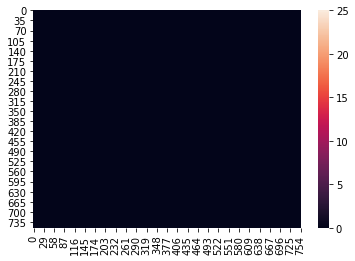

In [38]:
sns.heatmap(toplot_rigidethanol)

In [39]:
toplot_rigidethanol[0,3]

25.0

In [21]:
atoms4[0]

NameError: name 'atoms4' is not defined

In [28]:
results[0][1][results[0][0]].shape

(100, 12, 3)


# fig, ax = plt.subplots(figsize=(10,10))
# plot_watch_custom(toplot_rigidethanol, 756, ax,colors)


In [46]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Downloads/rigidethanol_120220_samgl_n100_p12_nrep25results.pkl' ,
         'rb') as loader:
     replicates_rigidethanol = pickle.load(loader)


In [47]:
nreps = 25
results  = results_rigidethanol

In [48]:
replicates = {}
for r in range(nreps):
    replicates[r] = Replicate()
    cs = rearrange(np.asarray(list(results[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(list(results[r][1].keys()))
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates[r].cs_order = cs_reorder
    replicates[r].xaxis_reorder = xaxis_reorder

In [49]:
def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
        selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

        selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]
    
        return(selected_functions_at_selection_lambda)
    else:
        return(np.asarray([]))

def get_toplot(supports,p,d):
    to_plot = np.zeros(np.repeat(p,d))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            if len(support_indices[i]) > 0:
                #print(tuple(support_indices[i]), to_plot[tuple(support_indices[i])])#, print(to_plot[-1])
                to_plot[tuple(support_indices[i])] += 1

    return(to_plot)

supports_rigidethanol = {}
for i in range(nreps):
    print(i)
    supports_rigidethanol[i] = get_support(replicates[i].cs_order, dim = 2)

toplot_rigidethanol = get_toplot(supports_rigidethanol, 12,2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


<IPython.core.display.Javascript object>


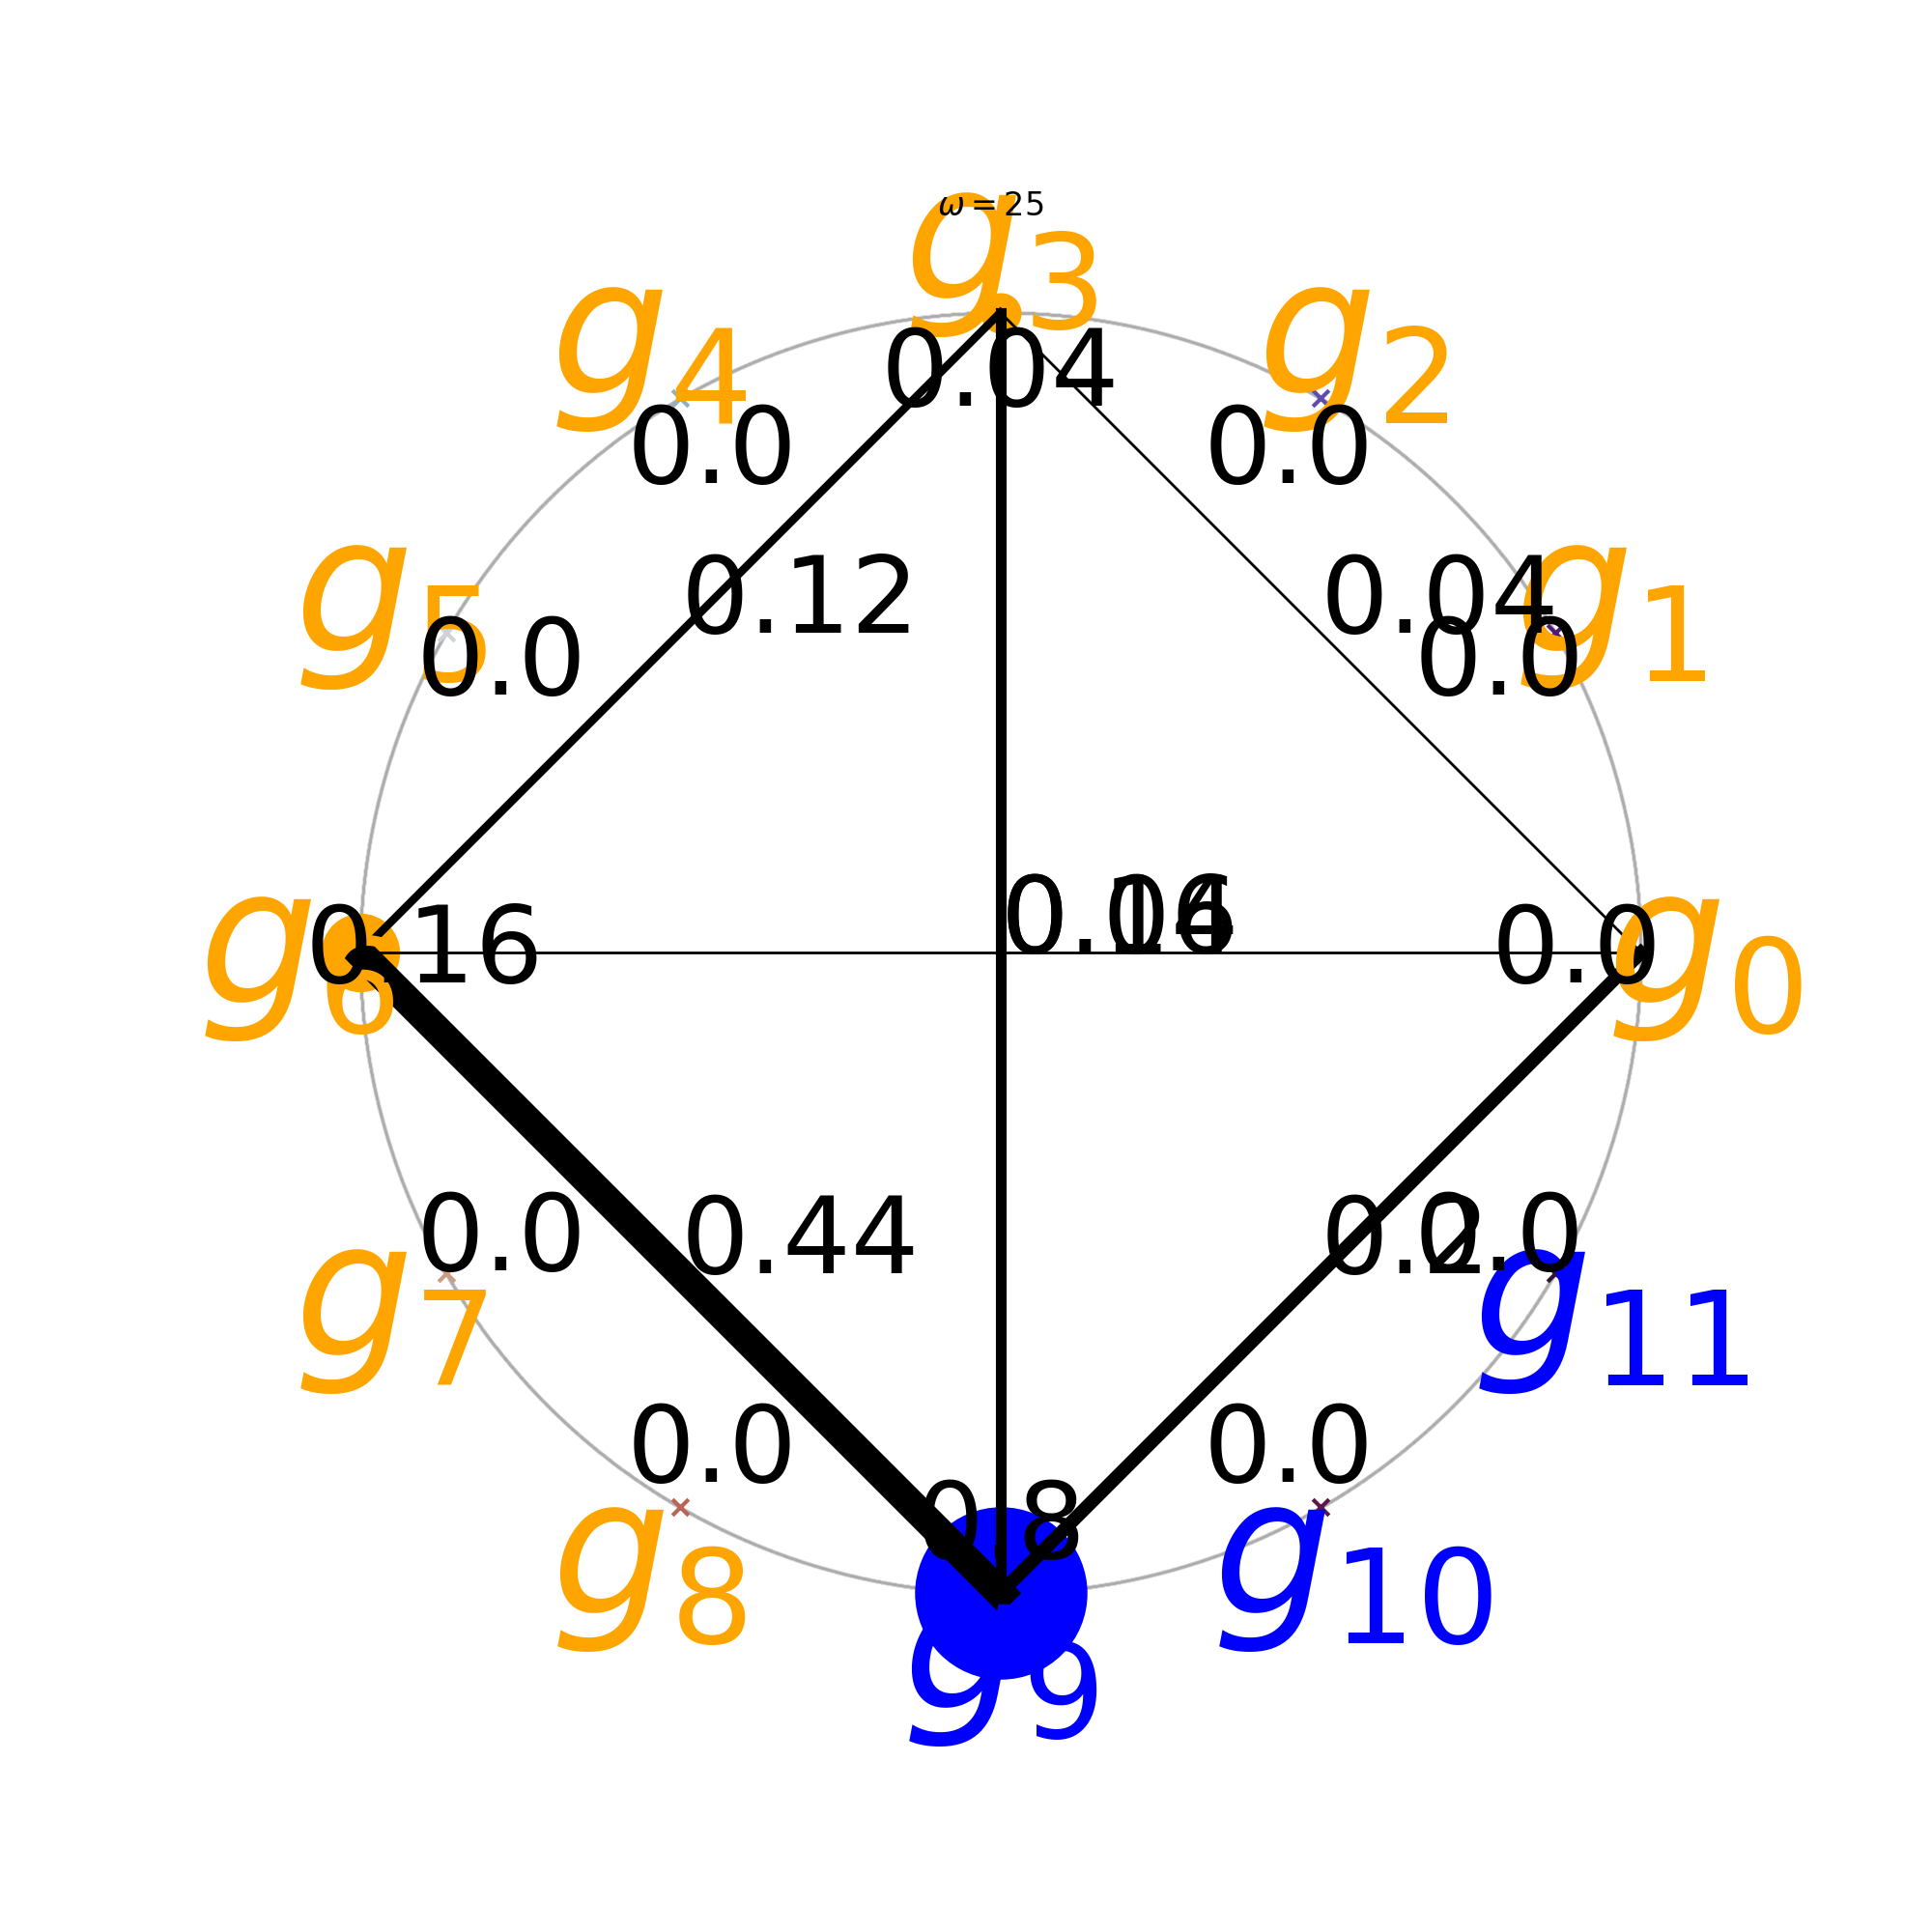

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


In [50]:

fig, ax = plt.subplots(figsize=(10,10))
plot_watch_custom(toplot_rigidethanol, 12, ax,colors)


In [51]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Desktop/rigidethanol_120220_samgl_n100_pall_nrep25results.pkl' ,
         'rb') as loader:
     results_rigidethanol2 = pickle.load(loader)


In [52]:
results_rigidethanol[0]

(0.008660254037844388,
 {0.0: array([[[ 6.08003609e-02, -7.25883788e-03, -3.43874042e-03],
          [-5.54065978e-02,  6.08695486e-03,  2.77677792e-03],
          [ 5.50205904e-02, -6.75553412e-03, -3.54813762e-03],
          ...,
          [-1.47541906e-02,  1.62497648e-02, -5.24001307e-03],
          [-1.46726031e-02,  1.59663967e-02, -4.67055801e-03],
          [ 1.52337420e-02, -1.65292268e-02,  5.04575851e-03]],
  
         [[ 6.22581155e-02, -4.20819853e-02, -9.85249215e-03],
          [-5.67870956e-02,  3.87128083e-02,  8.87992153e-03],
          [ 5.66730158e-02, -3.89482000e-02, -8.46197186e-03],
          ...,
          [ 5.94165723e-02, -3.19180967e-02, -2.24739936e-01],
          [ 5.89460316e-02, -3.15041243e-02, -2.23684761e-01],
          [-5.90341566e-02,  3.13550019e-02,  2.23772253e-01]],
  
         [[-2.44288992e-02, -8.59829919e-02,  7.71036128e-03],
          [-2.21362198e-02, -7.88922918e-02,  7.94913942e-03],
          [ 2.20408680e-02,  7.86286266e-02, -8.3371

In [54]:
results_rigidethanol2[0]

(0.03651740006917935,
 {0.0: array([[[ 1.13075540e-05,  9.66736398e-06,  2.20840229e-07],
          [ 1.49140506e-05, -1.32056772e-05, -5.89703418e-06],
          [-9.47370655e-06, -3.29169755e-05, -1.33853375e-05],
          ...,
          [ 1.59136093e-05,  4.39099370e-05,  2.01284100e-05],
          [-8.70254021e-06,  1.29481055e-05,  2.74606751e-06],
          [ 1.34432123e-05, -2.89668260e-05, -1.23644164e-05]],
  
         [[ 1.22269332e-05,  4.92080534e-06, -4.74165993e-05],
          [ 1.56775732e-05,  1.84318086e-05, -1.28277513e-05],
          [-3.39926414e-05, -2.41317724e-05,  1.59493084e-04],
          ...,
          [ 5.02119587e-05,  1.78490854e-05, -1.54786475e-04],
          [-4.23336118e-05, -1.99951349e-05,  3.66864620e-05],
          [ 1.86420308e-05,  1.19575087e-05, -8.07153995e-06]],
  
         [[ 1.51578052e-06, -6.33292821e-06, -3.91895687e-05],
          [-8.21154887e-07,  2.81162672e-05,  1.12175803e-04],
          [ 9.71815395e-07,  2.39375024e-05,  1.81873

In [56]:
nreps = 25
results2  = results_rigidethanol2

In [67]:
replicates = {}
for r in range(nreps):
    print(r)
    if results2[r] is not None:
        print(r)
        replicates[r] = Replicate()
        cs = rearrange(np.asarray(list(results2[r][1].values())), 'l n p m -> l m n p')
        xaxis = np.asarray(list(results2[r][1].keys()))
        cs_reorder = cs[xaxis.argsort()]
        xaxis_reorder = xaxis[xaxis.argsort()]
        replicates[r].cs_order = cs_reorder
        replicates[r].xaxis_reorder = xaxis_reorder

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24


In [59]:
if results2[r] is None:
    print('hi')

hi


In [69]:
def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    if len(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]) > 0:
        selection_lambda = np.min(np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0])

        selected_functions_at_selection_lambda = selected_functions[1][np.where(selected_functions[0] == selection_lambda)[0]]
    
        return(selected_functions_at_selection_lambda)
    else:
        return(np.asarray([]))

def get_toplot(supports,p,d):
    to_plot = np.zeros(np.repeat(p,d))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            if len(support_indices[i]) > 0:
                #print(tuple(support_indices[i]), to_plot[tuple(support_indices[i])])#, print(to_plot[-1])
                to_plot[tuple(support_indices[i])] += 1

    return(to_plot)

supports_rigidethanol = {}
for i in range(nreps):
    print(i)
    if results2[i] is not None:
        print(i)
        supports_rigidethanol[i] = get_support(replicates[i].cs_order, dim = 2)

#toplot_rigidethanol = get_toplot(supports_rigidethanol, 756,2)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24


In [66]:
results2[r] is not None

True

In [70]:
toplot_rigidethanol = get_toplot(supports_rigidethanol, 756,2)

In [73]:
toplot_rigidethanol

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
colors = np.repeat('black', 756)

<IPython.core.display.Javascript object>


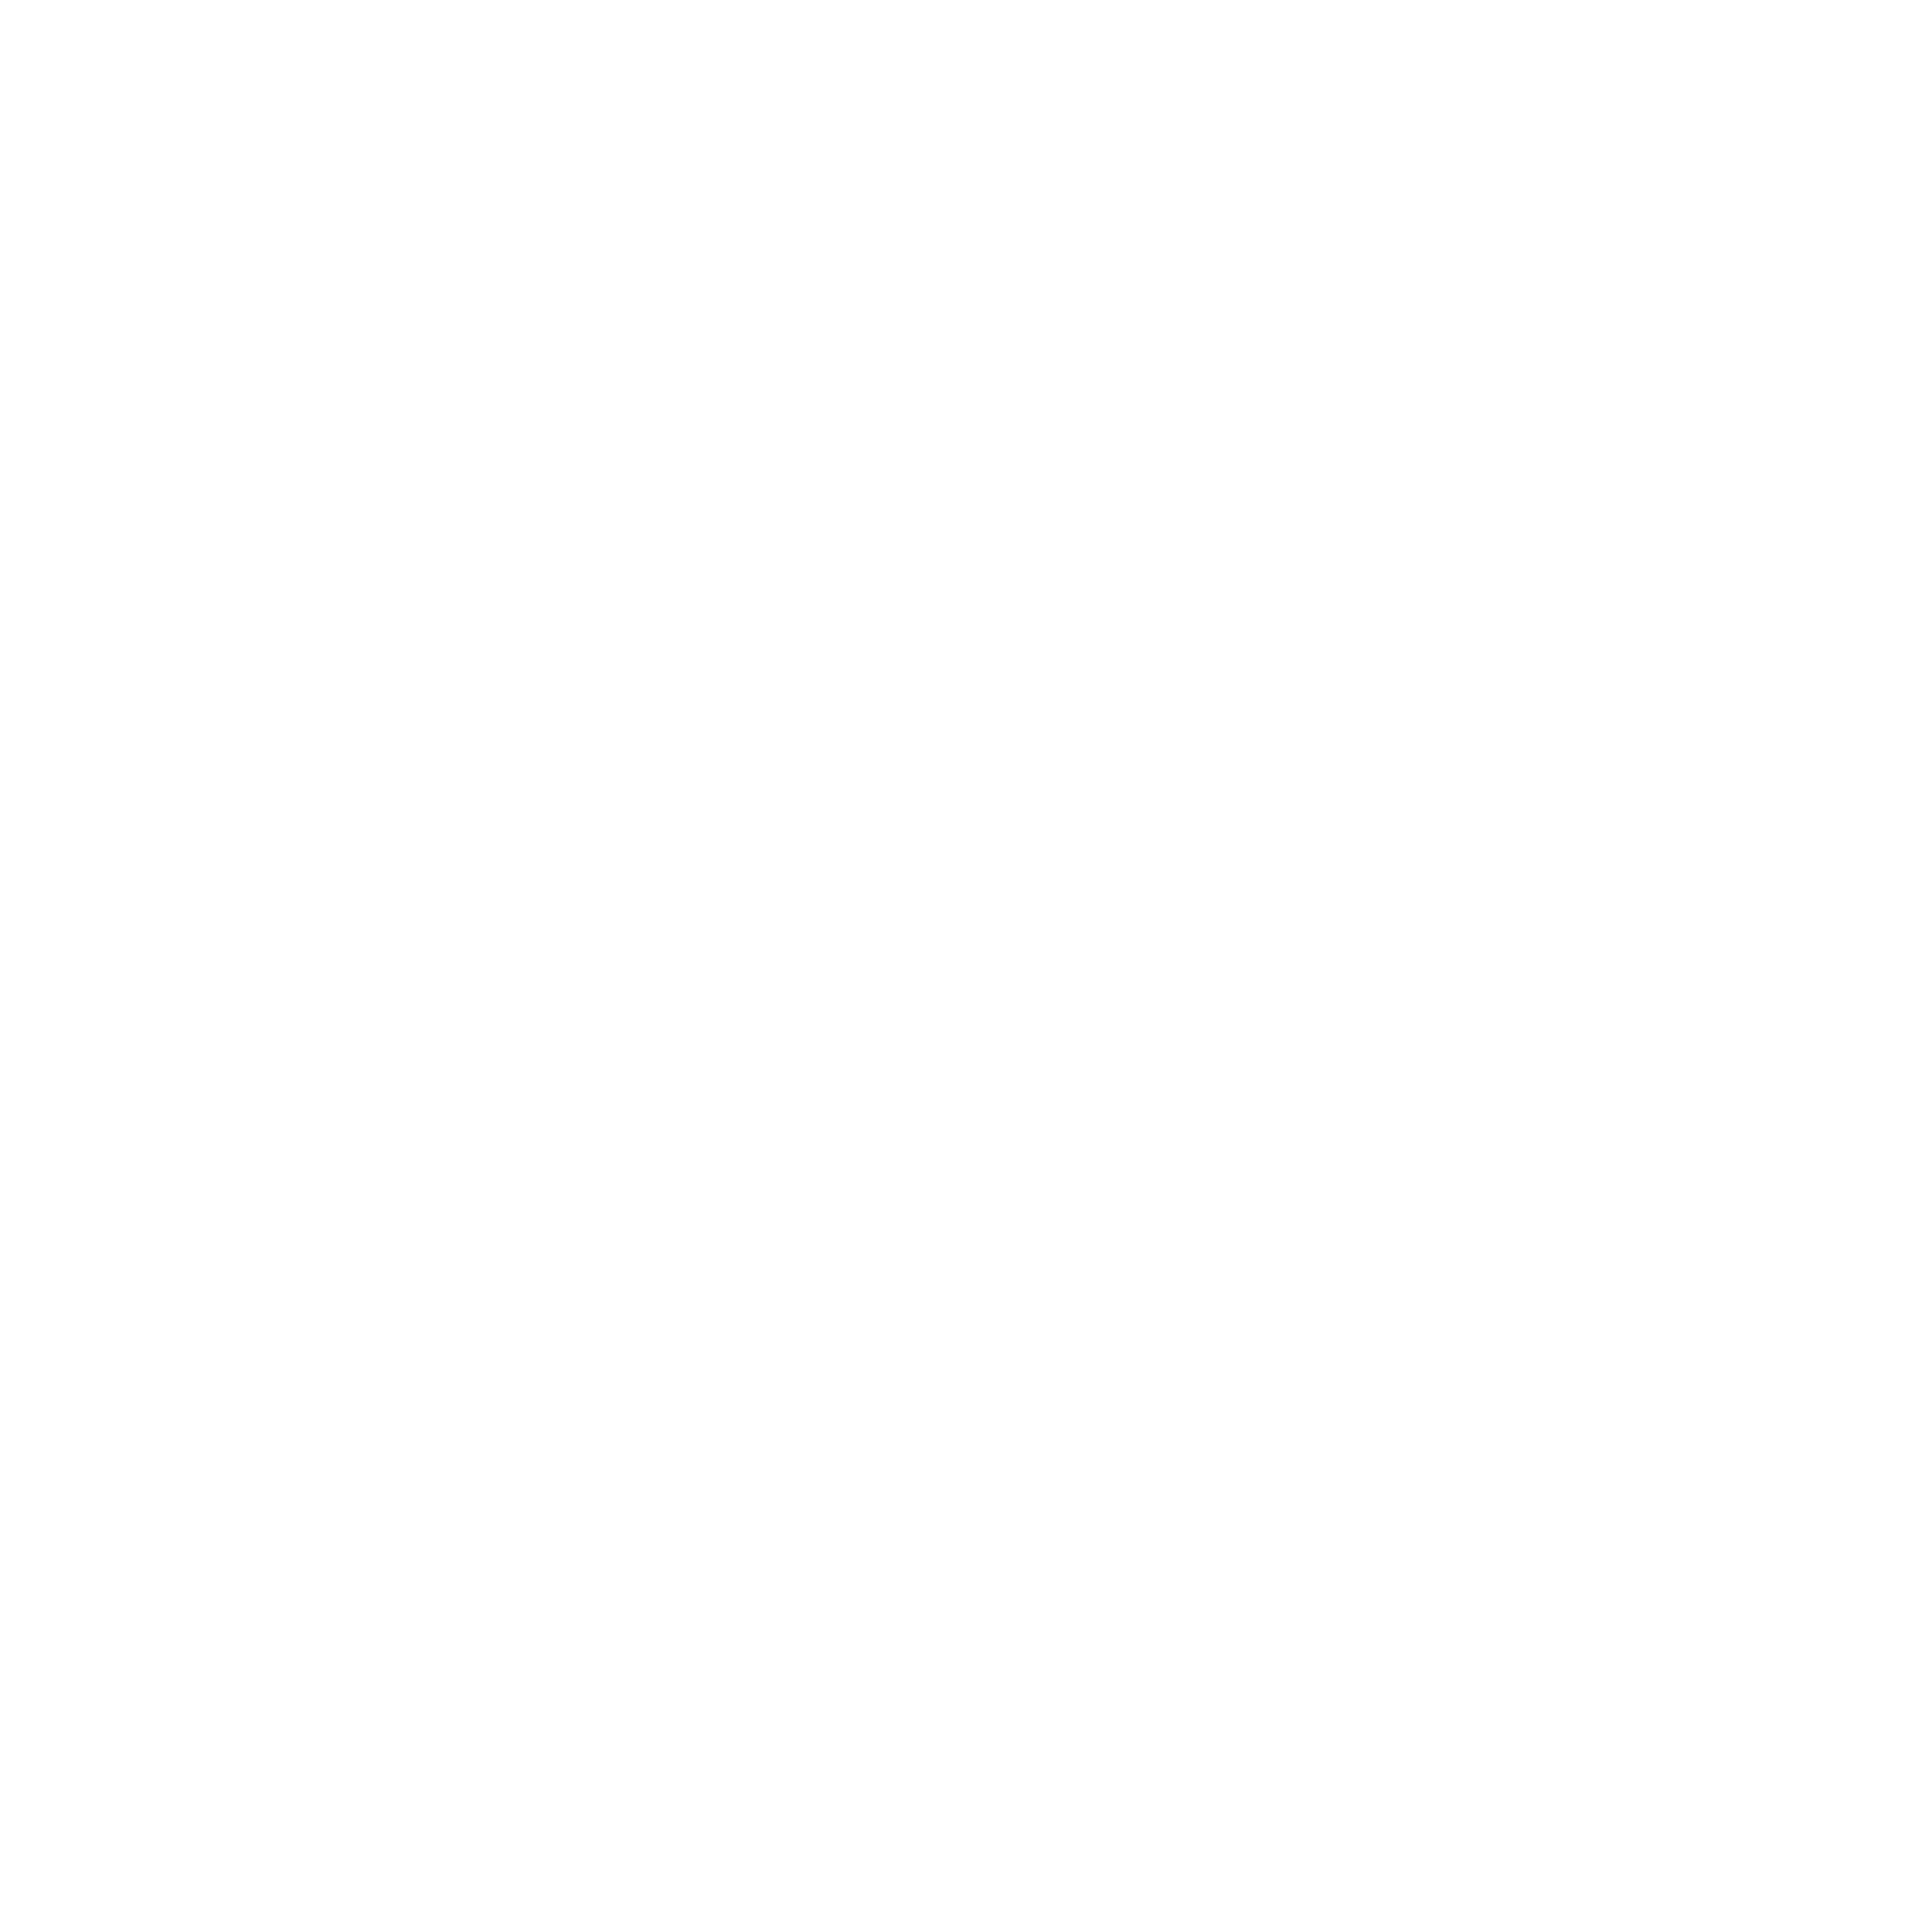

1.0 0.0
0.9999654630763769 0.008310995996097024
0.9998618546911057 0.016621417919726152
0.9996891820008162 0.024930691738072875
0.9994474569326756 0.03323824349762674
0.9991366961835642 0.041543499363826515
0.9987569212189223 0.04984588566069716
0.9983081582712682 0.05814482891047583
0.997790438338385 0.06643975587322418
0.9972037971811801 0.07473009358642425
0.9965482753212155 0.08301526940455524
0.9958239180379078 0.0912947110386483
0.9950307753654014 0.09956784659581666
0.9941689020891121 0.10783410461875863
0.993238357741943 0.11609291412523023
0.9922392066001721 0.12434370464748516
0.9911715176790128 0.13258590627167927
0.9900353647278465 0.14081894967723654
0.9888308262251285 0.14904226617617444
0.9875579853729676 0.15725528775238523
0.9862169300913782 0.16545744710087118
0.984807753012208 0.17364817766693033
0.9833305514727394 0.18182691368529075
0.9817854275089658 0.18999309021918998
0.9801724878485438 0.19814614319939758
0.9784918439034213 0.2062855094631774
0.9767436117621412

-0.34981811261101475 0.936817638651871
-0.3575919186134861 0.9338779469193638
-0.3653410243663949 0.9308737486442042
-0.3730648946091938 0.9278052513379255
-0.3807629958244495 0.9246726669534415
-0.3884347962746947 0.9214762118704076
-0.3960797660391568 0.918216106880274
-0.40369737705036224 0.9148925771710347
-0.4112871031306114 0.9115058523116732
-0.41884842002832473 0.908056166236305
-0.4263808054542537 0.9045437572280193
-0.43388373911755806 0.9009688679024191
-0.44135670276174394 0.897331745190864
-0.44879918020046217 0.8936326403234123
-0.456210657353163 0.8898718088114685
-0.4635906222806057 0.8860495104301344
-0.4709385652202202 0.8821660092002641
-0.4782539786213183 0.8782215733702284
-0.4855363571801518 0.8742164753973858
-0.4927851978748174 0.8701509919292612
-0.4999999999999998 0.8660254037844388
-0.507180265201559 0.8618399959331641
-0.5143254975109535 0.8575950574776596
-0.5214352033794979 0.8532908816321557
-0.5285088917124554 0.8489277657026375
-0.5355460739029584 0.844

-0.5837436722347898 -0.8119380057158565
-0.5769754980095829 -0.8167614551976567
-0.5701674698669617 -0.821528487823464
-0.563320058063622 -0.8262387743159949
-0.5564337355766409 -0.8308919893176399
-0.5495089780708059 -0.8354878114129365
-0.5425462638657592 -0.8400259231507715
-0.535546073902959 -0.8445060110663075
-0.5285088917124561 -0.8489277657026371
-0.5214352033794986 -0.8532908816321554
-0.5143254975109541 -0.8575950574776592
-0.5071802652015597 -0.8618399959331637
-0.5000000000000004 -0.8660254037844384
-0.49278519787481806 -0.8701509919292607
-0.4855363571801525 -0.8742164753973855
-0.4782539786213185 -0.8782215733702283
-0.4709385652202204 -0.882166009200264
-0.4635906222806059 -0.8860495104301342
-0.4562106573531632 -0.8898718088114685
-0.4487991802004624 -0.8936326403234122
-0.44135670276174416 -0.8973317451908639
-0.4338837391175583 -0.900968867902419
-0.42638080545425394 -0.9045437572280192
-0.41884842002832495 -0.9080561662363049
-0.41128710313061156 -0.9115058523116731


0.9530900941667729 -0.3026867562368264
0.9555728057861406 -0.2947551744109047
0.9579895123154888 -0.2868032327110907
0.9603400468235997 -0.2788314804085907
0.9626242469500119 -0.2708404681430055
0.9648419549162348 -0.2628307478842957
0.9669930175366471 -0.2548028728946549
0.9690772862290778 -0.24675739769029398
0.9710946170250698 -0.23869487800313802
0.9730448705798238 -0.23061587074244044
0.9749279121818235 -0.22252093395631464
0.9767436117621412 -0.21441062679318765
0.9784918439034213 -0.20628550946317756
0.9801724878485438 -0.19814614319939772
0.9817854275089658 -0.18999309021919009
0.9833305514727394 -0.18182691368529083
0.984807753012208 -0.1736481776669304
0.9862169300913782 -0.1654574471008712
0.9875579853729676 -0.15725528775238523
0.9888308262251285 -0.1490422661761744
0.9900353647278465 -0.14081894967723646
0.9911715176790128 -0.13258590627167915
0.9922392066001721 -0.12434370464748502
0.9932383577419429 -0.11609291412523093
0.994168902089112 -0.1078341046187593
0.99503077536

KeyboardInterrupt: 

In [75]:

fig, ax = plt.subplots(figsize=(10,10))
plot_watch_custom(toplot_rigidethanol, 756, ax,colors)


In [81]:
from collections import Counter

In [84]:
np.asarray(list(supports_rigidethanol.values()))

array([[187, 740],
       [199, 745],
       [187, 708],
       [187, 708],
       [708, 722],
       [708, 734],
       [199, 746],
       [708, 722],
       [199, 722],
       [181, 708],
       [199, 745],
       [187, 740],
       [716, 740],
       [708, 710],
       [199, 746],
       [710, 740],
       [181, 740],
       [181, 740],
       [181, 734],
       [708, 738],
       [199, 740],
       [199, 746],
       [708, 740],
       [180, 708]])

In [93]:
with open(workingdirectory + '/untracked_data/embeddings/re_test_exp.pkl' ,
         'rb') as file:
     experiment = pickle.load(file)


In [95]:
g1fast =  experiment.get_g_full_sub(experiment.M.data, atoms4[708])

#g2fast = experiment.get_g_full_sub(experiment.M.data, np.asarray([5, 4, 6, 8]))#np.asarray([6, 4, 7, 8]))#np.asarray([2, 0, 6, 7]))

In [101]:
g3fast =  experiment.get_g_full_sub(experiment.M.data, atoms4[181])

In [105]:
g2fast =  experiment.get_g_full_sub(experiment.M.data, atoms4[740])


In [106]:
g4fast =  experiment.get_g_full_sub(experiment.M.data, atoms4[199])


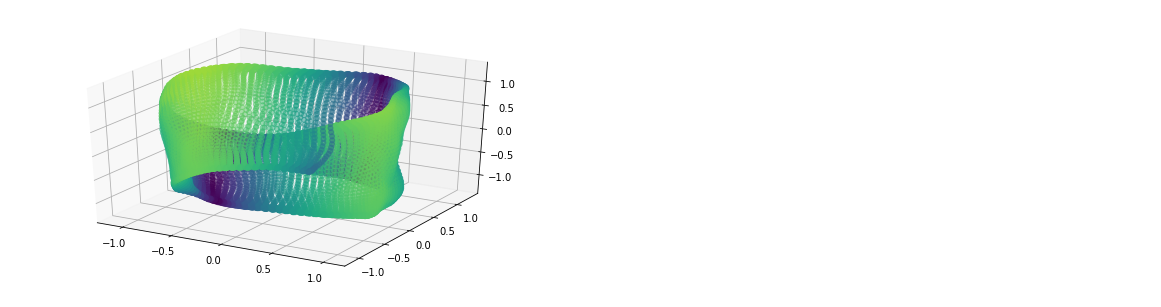

In [103]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(10000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g1fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=1.)

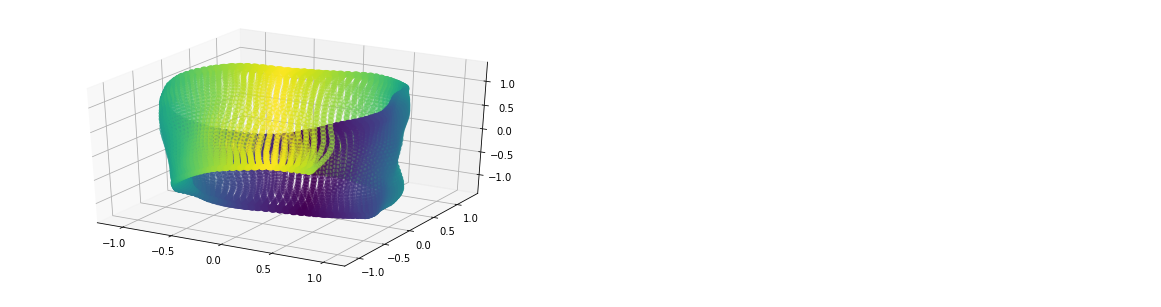

In [100]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(10000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g2fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)


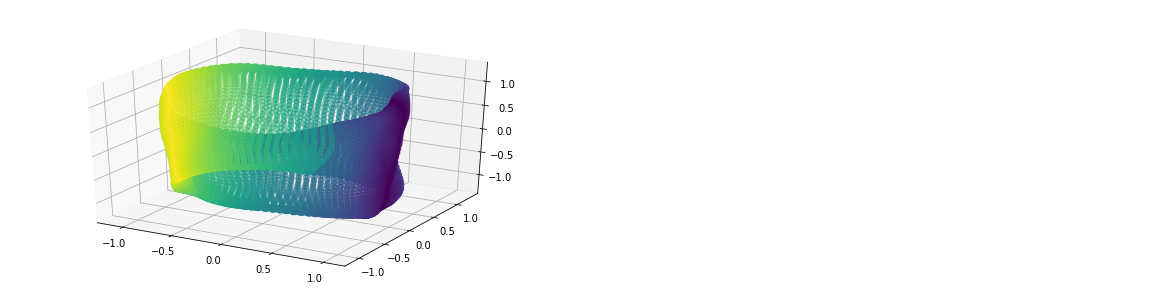

In [107]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(10000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g4fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)


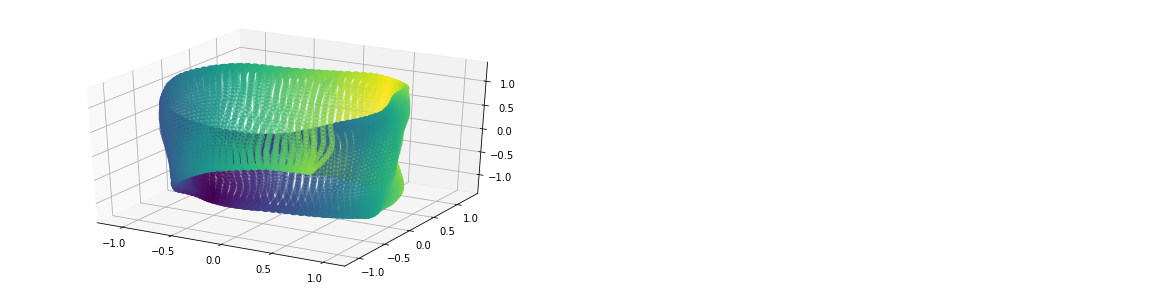

In [102]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(10000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g3fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)


In [97]:
g1fast.min()

0.0002958876758501383

In [98]:
g1fast.max()

0.8565024302356583

In [86]:
from codes.otherfunctions.get_dictionaries import get_all_atoms_4

In [88]:
atoms4,p = get_all_atoms_4(9)

In [89]:
atoms4[180]

array([0, 2, 5, 6])

In [91]:
atoms4[708], atoms4[740]

(array([3, 5, 6, 8]), array([8, 5, 4, 7]))

In [ ]:
def plot_cosines(cosines, ax, colors):
    p = cosines.shape[0]
    sns.heatmap(cosines ,ax = ax)
    for xtick, color in zip(ax.get_xticklabels(), colors):
        xtick.set_color(color)
    for ytick, color in zip(ax.get_yticklabels(), colors):
        ytick.set_color(color)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 500 / p)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 500 / p)
    
    ax.set_ylabel(r"$g_j$", fontsize = 70)
    ax.set_xlabel(r"$g_i$", fontsize = 70)
    #ax.set_title(r"$\text{hi}$")
    ax.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{ij'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_i (\xi_i) \|_2 \| grad_{\mathcal M} g_j(\xi_i) \|_2} $",
                fontsize = 70)
    
def plot_watch_custom_fast(to_plot, p, ax,colors):
    #fig, ax = plt.subplots(figsize = (15,15))
    #%matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    #figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    ax.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
        ax.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = r"$g_{{{}}}$".format(j),color=colors[j],#cmap.colors[j],
                  fontdict = {'fontsize' : 70},
                  horizontalalignment='center',
         verticalalignment='center')



        ax.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=colors[j], marker  = 'o', s = 200*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                ax.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    ax.text( x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 40})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')

                #axes.axline((x1, y1), (x2, y2))
    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_title(r"$\omega = 25$")